## **Statistical Learning – Data science - 2021/22 – Exercise 5 – 24/05/2022**
# **Exercise 5: Analysis of Human Tumor Microarray dataset - unsupervised learning, clustering with k-means**

In [1]:
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from IPython.display import Image # to visualize images
from tabulate import tabulate # to create tables

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/14cancer/chart.png
/kaggle/input/14cancer/14cancer.ytrain.txt
/kaggle/input/14cancer/14cancer.xtrain.txt
/kaggle/input/14cancer/chart2.png


## **1. Download the “14-cancer microarray data” from the [book website](https://web.stanford.edu/~hastie/ElemStatLearn/)**
* Get information about the dataset in file 14cancer.info and in Chapter 1 (page 5) of the book (Hastie et al., 2009)

Some info about `14cancer.xtrain.txt` and `14cancer.ytrain.txt`.

* DNA microarrays measure the expression of genes in a cell

* 14-cancer gene expression data set:
    * 16064 genes
    * 144 training samples
    * 54 test samples

* One gene per row, one sample per column.

* Cancer classes are labelled as follows:
    1.  breast
    2.  prostate
    3.  lung
    4.  collerectal
    5.  lymphoma
    6.  bladder
    7.  melanoma
    8.  uterus
    9.  leukemia
    10. renal
    11. pancreas
    12. ovary
    13. meso
    14. cns

## **2. Generate a new Kernel SLDatascience_EX5_HumanTumorMicro_Clustering_Surname in Kaggle**
> <h2>✅</h2>

## **3. Load the data in Kaggle**
> <h2>✅</h2>

# **Data acquisition**

In [2]:
# Load the Cancer Microarray dataset (already splitted in train and test)
xtrain = pd.read_csv('/kaggle/input/14cancer/14cancer.xtrain.txt', sep='\s+',header=None)
ytrain = pd.read_csv('/kaggle/input/14cancer/14cancer.ytrain.txt',sep='\s+',header=None)

<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>
                    Warning 1: the dataset is already splitted in training set and test set.
            </strong>
        </div>   
    </div> 
</div>

# **Data pre-processing**

In [3]:
xtrain = xtrain.transpose() # The columns represent the genes, and the rows are the different samples
ytrain = ytrain.transpose() # for each sample I have a label

(n_samples, n_genes), n_labels = xtrain.shape, np.unique(ytrain).size
print(f"#genes: {n_genes}, #samples: {n_samples}, #labels {n_labels}")

#genes: 16063, #samples: 144, #labels 14


<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>            
                Warning 2: I don't standardize the data before to perform clustering, in order to do not loose the natural properties of my dataset.
            </strong>
        </div>   
    </div> 
</div>

In [4]:
xtrain

,0,1,2,3,4,5,6,7,8,9,...,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,-73.0,-69.0,-48.0,13.0,-86.0,-147.0,-65.0,-71.0,-32.0,100.0,...,-134.0,352.0,-67.0,121.0,-5.0,-11.0,-21.0,-41.0,-967.0,-120.0
1,-16.0,-63.0,-97.0,-42.0,-91.0,-164.0,-53.0,-77.0,-17.0,122.0,...,-51.0,244.0,-15.0,119.0,-32.0,4.0,-14.0,-28.0,-205.0,-31.0
2,4.0,-45.0,-112.0,-25.0,-85.0,-127.0,56.0,-110.0,81.0,41.0,...,14.0,163.0,-14.0,7.0,15.0,-8.0,-104.0,-36.0,-245.0,34.0
3,-31.0,-110.0,-20.0,-50.0,-115.0,-113.0,-17.0,-40.0,-17.0,80.0,...,26.0,625.0,18.0,59.0,-10.0,32.0,-2.0,10.0,-495.0,-37.0
4,-33.0,-39.0,-45.0,14.0,-56.0,-106.0,73.0,-34.0,18.0,64.0,...,-69.0,398.0,38.0,215.0,-2.0,44.0,3.0,68.0,-293.0,-34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,-196.0,-369.0,-263.0,162.0,-277.0,-615.0,-397.0,-243.0,70.0,-167.0,...,-25.0,2674.0,171.0,1499.0,95.0,735.0,-12.0,647.0,-2414.0,-33.0
140,34.0,-81.0,-146.0,-151.0,-174.0,-121.0,-290.0,-106.0,43.0,240.0,...,-32.0,226.0,189.0,310.0,-13.0,210.0,-22.0,622.0,-889.0,-104.0
141,-56.0,-818.0,-1338.0,-57.0,-989.0,-796.0,-1466.0,-347.0,-413.0,103.0,...,-85.0,1827.0,581.0,1547.0,-72.0,999.0,-461.0,564.0,-3567.0,-192.0
142,-245.0,-235.0,-127.0,197.0,-562.0,-714.0,-1621.0,-226.0,-35.0,-243.0,...,-419.0,580.0,233.0,1065.0,-71.0,397.0,-28.0,114.0,-3086.0,-16.0


## **Clustering Analysis**

## **4. Use the `sklearn.cluster` module to perform clustering analysis on the dataset. In particular, repeat the analysis proposed in section 14.3.8 of the book (Hastie et al., 2009)**

* Start using **`K-means`** and then test some **other clustering algorithms** at your choice
* Cluster the samples (i.e., columns). Each sample has a label (tumor type)
* **Do not use the labels in the clustering phase** but examine them posthoc to interpret the clusters
* Run k-means with K from **2 to 10** and compare the clusterings in terms of within-sum of squares
* Show the chart of the performance depending on K
* Select some K and analyze the clusters as done in the book

### **K-Means**
The **KMeans algorithm** clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the **inertia** or **within-cluster sum-of-squares**.

The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster. The means are commonly called the cluster “*centroids*”; note that they are not, in general, points from, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

In [5]:
# K-means with k from 2 to 10

n_clusters = range(2,11)
alg = 'k-means++' # Method for initialization
niter = 10 # Number of time the k-means algorithm will be run with different centroid seeds.
wc_km_sos=[] # within_cluster_km_sos

print('k\tInertia\t\t\tdecrease %')
print(50 * '-')
formatter_result = ("{:d}\t{:f}\t{:f}")

for k in n_clusters:
    
    results = []
    results.append(k)
    
    km = KMeans(init=alg, n_clusters=k, n_init=niter).fit(xtrain)
    
    # inertia = Sum of squared distances of samples to their closest cluster center  
    wcv = km.inertia_
    wc_km_sos.append(wcv)
    results.append(wcv)
    
    # variations in %
    if len(wc_km_sos)>1:
        results.append(
            (wc_km_sos[k-2] - wc_km_sos[k-3])*100/wc_km_sos[k-2]
        )
    else:
        results.append(0)
        
    print(formatter_result.format(*results))    

k	Inertia			decrease %
--------------------------------------------------
2	866070488704.476074	0.000000
3	728215342983.054443	-18.930547
4	637161384023.146240	-14.290565
5	582083545997.503784	-9.462188
6	541930944964.784607	-7.409173
7	501565429046.019531	-8.047906
8	485493839665.857422	-3.310359
9	466074602868.980408	-4.166551
10	444072405139.717773	-4.954642


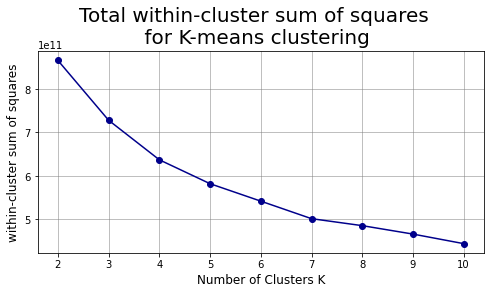

In [6]:
# fig 
width, height = 8, 4
fig, ax = plt.subplots(figsize=(width,height))

ax.plot(n_clusters, wc_km_sos,  marker='o', color="darkblue")
ax.grid(color='grey', linestyle='-', linewidth=0.5);
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))

ax.set_xlabel("Number of Clusters K", fontsize=12)
ax.set_ylabel("within-cluster sum of squares", fontsize=12)

plt.suptitle("Total within-cluster sum of squares\n for K-means clustering",fontsize=20)
plt.subplots_adjust(top=0.825) # change title position

plt.show()

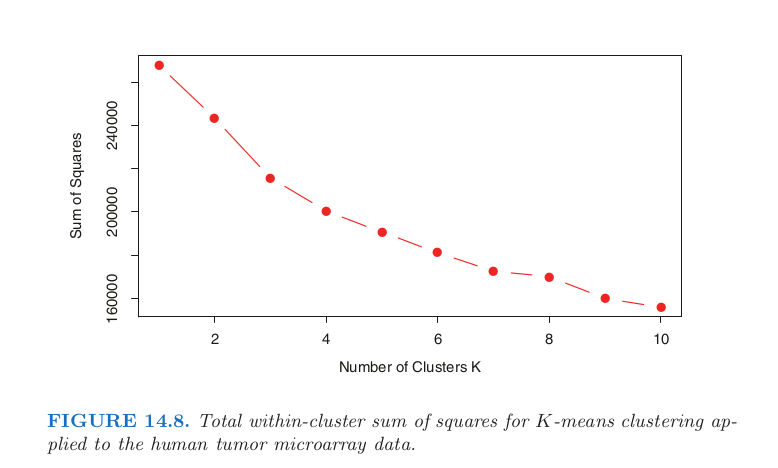

In [7]:
# We can compare the above chart with the one in the book:
scale = 80
Image("../input/14cancer/chart.png", width = width*scale, height = height*scale)

### **Comparison between different method of initialization: `k-means` vs `random`**

In [8]:
n_clusters = range(2,11)
niter = 10 # Number of time the k-means algorithm will be run with different centroid seeds.
wc_kmpp, wc_rnd = [], []

print('k\tK-means\t\t\trandom')
print(60 * '-')
formatter_result = ("{:d}\t{:f}\t{:f}")

for k in n_clusters:
    
    results = []
    results.append(k)
    
    kmpp = KMeans(init="k-means++", n_clusters=k, n_init=niter).fit(xtrain)
    rnd = KMeans(init="random", n_clusters=k, n_init=niter).fit(xtrain)

    results.append(kmpp.inertia_)
    results.append(rnd.inertia_)
   
    wc_kmpp.append(kmpp.inertia_)
    wc_rnd.append(rnd.inertia_)

    print(formatter_result.format(*results))    

k	K-means			random
------------------------------------------------------------
2	866070488704.476196	866070488704.476074
3	728215342983.054443	728215342983.054443
4	638286863470.537109	638081317466.990479
5	584280173232.295654	587075766466.636475
6	538209055840.842773	540943118751.786804
7	503381194087.148132	508440098567.509338
8	480645408569.097290	489492218342.491089
9	460322651562.982056	465580784065.419128
10	447375543732.545288	444831095366.731689


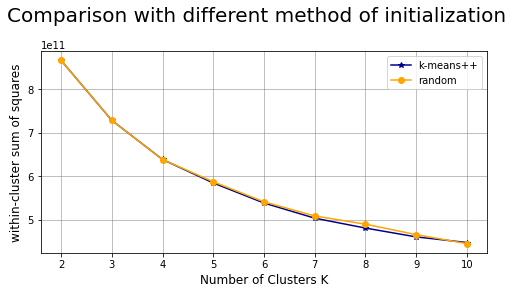

In [9]:
# fig 
width, height = 8, 4
fig, ax = plt.subplots(figsize=(width,height))

ax.plot(n_clusters, wc_kmpp,  marker='*', color="darkblue", label = "k-means++")
ax.plot(n_clusters, wc_rnd,  marker='o', color="orange", label = "random")

ax.grid(color='grey', linestyle='-', linewidth=0.5);
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.legend()
ax.set_xlabel("Number of Clusters K", fontsize=12)
ax.set_ylabel("within-cluster sum of squares", fontsize=12)

plt.suptitle("Comparison with different method of initialization",fontsize=20)
plt.subplots_adjust(top=0.825) # change title position

plt.show()

### **Comparison between different `n_iter`**:
Number of time the k-means algorithm will be run with different centroid seeds.

In [10]:
n_clusters = range(2,11)
wc_ten_seeds, wc_twenty_seeds = [], []

print('k\tn_iter=10\t\tn_iter=20')
print(70 * '-')
formatter_result = ("{:d}\t{:f}\t{:f}")

for k in n_clusters:
    
    results = []
    results.append(k)
    
    ten_seeds = KMeans(init="k-means++", n_clusters=k, n_init=10).fit(xtrain)
    twenty_seeds = KMeans(init="k-means++", n_clusters=k, n_init=20).fit(xtrain)

    results.append(ten_seeds.inertia_)
    results.append(twenty_seeds.inertia_)
   
    wc_ten_seeds.append(ten_seeds.inertia_)
    wc_twenty_seeds.append(twenty_seeds.inertia_)

    print(formatter_result.format(*results))    

k	n_iter=10		n_iter=20
----------------------------------------------------------------------
2	866070488704.476074	865755593329.079102
3	728028390816.590210	727972625271.491211
4	639723868185.660278	638286863470.537109
5	579977474766.300903	580224574540.047607
6	543140308602.200195	537625894944.809998
7	499824352123.143555	499900728332.191284
8	481177796841.305420	478729684111.517700
9	463786737203.969238	455823165084.713989
10	447920765947.759399	440614709199.603394


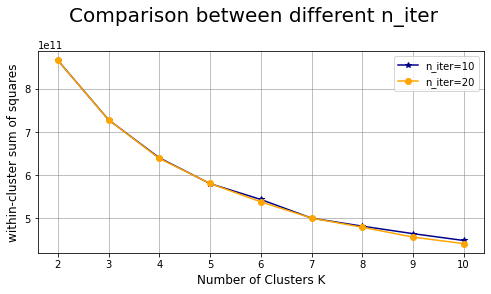

In [11]:
# fig 
width, height = 8, 4
fig, ax = plt.subplots(figsize=(width,height))

ax.plot(n_clusters, wc_ten_seeds,  marker='*', color="darkblue", label = "n_iter=10")
ax.plot(n_clusters, wc_twenty_seeds,  marker='o', color="orange", label = "n_iter=20")

ax.grid(color='grey', linestyle='-', linewidth=0.5);
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.legend()
ax.set_xlabel("Number of Clusters K", fontsize=12)
ax.set_ylabel("within-cluster sum of squares", fontsize=12)

plt.suptitle("Comparison between different n_iter",fontsize=20)
plt.subplots_adjust(top=0.825) # change title position

plt.show()

### **Mini-batch K-means**
The **MiniBatchKMeans** is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function.

Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution.

In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

In [12]:
# K-means with k from 2 to 10

n_clusters = range(2,11)
alg = 'k-means++' # Method for initialization
niter = 10 # Number of time the k-means algorithm will be run with different centroid seeds.
wc_mbkm_sos=[]

print('k\tInertia\t\t\tdecrease %')
print(50 * '-')
formatter_result = ("{:d}\t{:f}\t{:f}")

for k in n_clusters:
    
    results = []
    results.append(k)
    
    mbkm = MiniBatchKMeans(init=alg, n_clusters=k, n_init=niter).fit(xtrain)
    
    # inertia = Sum of squared distances of samples to their closest cluster center  
    wcv = mbkm.inertia_
    wc_mbkm_sos.append(wcv)
    results.append(wcv)
    
    # variations in %
    if len(wc_mbkm_sos)>1:
        results.append(
            (wc_mbkm_sos[k-2] - wc_mbkm_sos[k-3])*100/wc_mbkm_sos[k-2]
        )
    else:
        results.append(0)
        
    print(formatter_result.format(*results))    

k	Inertia			decrease %
--------------------------------------------------
2	866606413247.558105	0.000000
3	734446802772.409912	-17.994443
4	652299546168.573364	-12.593487
5	600304755050.523315	-8.661399
6	550736134934.529541	-9.000430
7	508236055605.001465	-8.362272
8	503937252748.384766	-0.853043
9	477708584067.349365	-5.490517
10	465972683467.220947	-2.518581


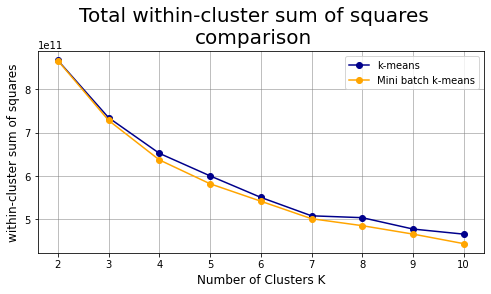

In [13]:
# fig 
width, height = 8, 4
fig, ax = plt.subplots(figsize=(width,height))

ax.plot(n_clusters, wc_mbkm_sos,  marker='o', color="darkblue", label = "k-means")
ax.plot(n_clusters, wc_km_sos,  marker='o', color="orange",  label = "Mini batch k-means")
ax.grid(color='grey', linestyle='-', linewidth=0.5);
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))

ax.legend()
ax.set_xlabel("Number of Clusters K", fontsize=12)
ax.set_ylabel("within-cluster sum of squares", fontsize=12)

plt.suptitle("Total within-cluster sum of squares\ncomparison",fontsize=20)
plt.subplots_adjust(top=0.825) # change title position

plt.show()

## **Analysis for K=3**

### **Number of cancer cases of each type in each of the 3 clusters**

In [14]:
rows = KMeans(init="k-means++", n_clusters=3).fit(xtrain).labels_  # labels of each sample after clustering
columns = ytrain.to_numpy().flatten()                              # make the df into an iterable list

# Collect info in a table
tab = np.zeros(3*n_labels).reshape(3,n_labels) # rows: clusters, columns: cancer labels

# Update table
for i in range(n_samples):
    tab[rows[i],columns[i]-1]+=1 # column-1 because we range over 14 clusters (0,13)
    
# Better formatting of the table into a DataFrame
table = pd.DataFrame(tab.astype(int))
table.columns = ["breast", "prostate", "lung", "collerectal", "lymphoma", "bladder",
                 "melanoma", "uterus", "leukemia", "renal", "pancreas", "ovary", "meso", "cns"]

In [15]:
table

,breast,prostate,lung,collerectal,lymphoma,bladder,melanoma,uterus,leukemia,renal,pancreas,ovary,meso,cns
0,8,3,6,5,1,7,5,3,0,5,6,4,4,2
1,0,2,0,0,2,0,0,2,21,1,0,2,0,0
2,0,3,2,3,13,1,3,3,3,2,2,2,4,14
